In [80]:
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import pandas as pd

In [81]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-08-04 18:23:56--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.05s   

2020-08-04 18:23:57 (1.26 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [82]:
read = pd.read_csv('FuelConsumption.csv')
write = read[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [83]:
split = np.random.rand(len(read)) < 0.8 
train = write[split]
test = write[~split]

In [84]:
from sklearn import linear_model 
from sklearn.preprocessing import PolynomialFeatures

In [85]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [86]:
poly = PolynomialFeatures(degree = 2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly  

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [87]:
regr = linear_model.LinearRegression()
train_y_poly = regr.fit(train_x_poly,train_y)
print("Coef: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coef:  [[ 0.         51.24231572 -1.64824401]]
Intercept:  [106.00666814]


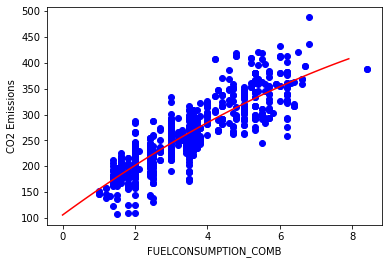

In [88]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="blue")
XX = np.arange(0.0,8.0,0.1)
yy = regr.intercept_[0]+ regr.coef_[0][1]*XX + regr.coef_[0][2]*np.power(XX,2)
plt.plot(XX,yy,'-r')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2 Emissions")
plt.show()

In [89]:
from sklearn.metrics import r2_score
test_x_poly = poly.fit_transform(test_x)
test_y_poly = regr.predict(test_x_poly)

In [90]:
mae = np.mean(np.absolute(test_y_poly - test_y))
mse = np.mean((test_y_poly - test_y)**2)
print("MAE: %2f" %mae)
print("MSE: %2f" %mse)
print("R2 Score: %2f" %r2_score(test_y_poly,test_y))

MAE: 22.147641
MSE: 840.881627
R2 Score: 0.704460
